# **Covid 19 by numpy**

การบ้านครั้งนี้เป็นการวิเคราะห์ข้อมูลจำนวนผู้ติดเชื้อที่รายงานในแต่ละวันของประเทศไทย โดยแยกเป็นจังหวัดและวันที่ที่ประกาศ นับแต่วันที่ 12 สิงหาคม 2564 เป็นต้นมา โดยข้อมูลมาจาก data.go.th 

**หมายเหตุ** การบ้านครั้งนี้ให้ใช้ library numpy ในการคำนวณเท่านั้น มีรายละเอียดอยู่ในแต่ละฟังก์ชัน

## **การเตรียมข้อมูล**

ให้นิสิตรันโปรแกรมในเซลล์ด้านล่างนี้ ซึ่งหลังจากที่จบการทำงานในเซลล์นี้ ข้อมูลจะเก็บอยู่ในตัวแปร 3 ตัว คือ 

 

1. ```provinces``` เป็น ```numpy.ndarray``` เก็บรายชื่อจังหวัด
2. ```dates```  เป็น ```numpy.ndarray``` เก็บข้อความซึ่งเป็นวันที่ เรียงจากน้อยไปมาก (วันล่าสุดอยู่ทางขวา)
3. ```data``` เป็น ```numpy.ndarray``` เก็บจำนวนผู้ติดเชื้อที่รายงานในแต่ละจังหวัดในแต่ละวัน โดย ```data[i,j]``` เป็นจำนวนผู้ติดเชื้อที่รายงานของจังหวัด ```provinces[i]``` ในวันที่ ```dates[j]```

ตัวอย่างข้อมูลใน ```provinces``` เป็นดังนี้

```
array(['กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์',...])
```

ตัวอย่างข้อมูลใน ```dates``` เป็นดังนี้ 

```
array(['2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15'...])
```

ตัวอย่างข้อมูลที่เก็บใน ```data``` เป็นดังนี้

```
array([[  35,    7,   19, ...,   94,   90,   89],
       [4856, 5161, 5093, ...,  923,  765,  879],
       [ 236,  265,  347, ...,   97,   99,   95],
       ...,
       [  63,  138,   59, ...,   31,   31,   24],
       [  56,   40,   33, ...,    8,    6,    1],
       [   9,    1,    4, ...,   40,   41,   12]], dtype=int32)
```

```4856``` (ข้อมูลในแถว 1 คอลัมน์ 0) เป็นจำนวนผู้ติดเชื้อที่รายงานในจังหวัด ```provinces[1]``` คือ กรุงเทพมหานคร และวันที่ ```dates[0]``` ซึ่งเป็นวันที่ '2021-08-12'

In [ ]:
#@title
! gdown https://drive.google.com/uc?id=1enFySmRhGnzSOKQQ1KLIUftr0aaq3ej8

from numpy import genfromtxt
import numpy as np

provinces=np.array(['กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร',
       'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท',
       'ชัยภูมิ', 'ชุมพร', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก', 'นครปฐม',
       'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์', 'นนทบุรี',
       'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี',
       'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พะเยา',
       'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'ภูเก็ต', 'มหาสารคาม',
       'มุกดาหาร', 'ยะลา', 'ยโสธร', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ร้อยเอ็ด',
       'ลพบุรี', 'ลำปาง', 'ลำพูน', 'ศรีสะเกษ', 'สกลนคร', 'สงขลา', 'สตูล',
       'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร', 'สระบุรี', 'สระแก้ว',
       'สิงห์บุรี', 'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์', 'สุโขทัย',
       'หนองคาย', 'หนองบัวลำภู', 'อำนาจเจริญ', 'อุดรธานี', 'อุตรดิตถ์',
       'อุทัยธานี', 'อุบลราชธานี', 'อ่างทอง', 'เชียงราย', 'เชียงใหม่',
       'เพชรบุรี', 'เพชรบูรณ์', 'เลย', 'แพร่', 'แม่ฮ่องสอน'])
dates=np.array(open('data.csv').readlines()[0].strip().split(','))
data=genfromtxt('data.csv', delimiter=',',skip_header=1).astype('int32')

Downloading...
From: https://drive.google.com/uc?id=1enFySmRhGnzSOKQQ1KLIUftr0aaq3ej8
To: /content/data.csv
100% 23.8k/23.8k [00:00<00:00, 51.2MB/s]


## **งานของคุณ**


### **งานที่ 1** หาจังหวัดที่มีจำนวนผู้ติดเชื้อมากที่สุดและน้อยที่สุดในวันที่กำหนด

เขียนฟังก์ชัน ```find_max_min_on_date(provinces,dates,data,date)``` ซึ่งรับข้อมูลเป็นอาร์เรย์ของจังหวัด (```provinces```) อาร์เรย์ของวันที่ (```dates```) ข้อมูลจากเซลล์ข้างต้น (```data```) และ ```date``` เป็นข้อความเก็บวันที่ต้องการหาข้อมูล โดยให้คืนข้อมูลเป็น dictionary ที่มีค่า key เป็น ```"max"``` และ ```"min"``` และมี value เป็นลิสต์ของจังหวัดที่มีผู้ติดเชื้อมากที่สุดและน้อยที่สุด โดยเรียงรายชื่อจังหวัดตามการปรากฏใน ```provinces``` 

รับประกันว่าข้อมูล ```date``` ที่ส่งเข้ามา จะมีในตัวแปร ```dates``` แน่ ๆ 

ตัวอย่างผลลัพธ์
*  ```find_max_min_on_date(provinces,dates,data,'2021-11-07')```
คืนค่า ```{'max': ['กรุงเทพมหานคร'], 'min': ['ยโสธร', 'อุทัยธานี']}```
*   ```find_max_min_on_date(provinces,dates,data,'2021-08-15')```
คืนค่า ```{'max': ['กรุงเทพมหานคร'], 'min': ['แม่ฮ่องสอน']}```



### **งานที่ 2** หาวันที่ที่มีจำนวนผู้ติดเชื้อมากที่สุดและน้อยที่สุดในจังหวัดที่กำหนด

เขียนฟังก์ชัน ```find_max_min_in_province(provinces,dates,data,province)``` ซึ่งรับข้อมูลอาร์เรย์ของจังหวัด (```provinces```) อาร์เรย์ของวันที่ (```dates```) ข้อมูลจากเซลล์ข้างต้น (```data```) และ ```province``` เป็นข้อความเก็บจังหวัดต้องการหาข้อมูล โดยให้คืนข้อมูลเป็น dictionary ที่มีค่า key เป็น ```"max"``` และ ```"min"``` และมี value เป็นลิสต์ของวันที่ที่มีผู้ติดเชื้อมากที่สุดและน้อยที่สุด โดยเรียงวันที่ตามการปรากฏใน ```dates``` 

รับประกันว่าข้อมูล ```province``` ที่ส่งเข้ามา จะมีในตัวแปร ```provinces``` แน่ ๆ 

ตัวอย่างผลลัพธ์
*  ```find_max_min_in_province(provinces,dates,data,'บึงกาฬ')```
คืนค่า 
```
{'max': ['2021-08-21'],
 'min': ['2021-09-20', '2021-09-26', '2021-10-03', '2021-10-29', '2021-11-08']}
```
*   ```find_max_min_in_province(provinces,dates,data,'นครปฐม')```
คืนค่า 
```
{'max': ['2021-08-14'], 'min': ['2021-10-27']}
```

### **งานที่ 3** อัตราการเปลี่ยนแปลงเฉลี่ย n วันล่าสุด 

กำหนดให้อัตราการเปลี่ยนแปลงในวันที่ i หมายถึง (จำนวนผู้ติดเชื้อที่รายงานในวันที่ (i) - จำนวนผู้ติดเชื้อที่รายงานในวันที่ (i-1))/จำนวนผู้ติดเชื้อที่รายงานในวันที่ (i-1)

ตัวอย่างเช่น ในกรุงเทพมหานคร มีข้อมูลดังนี้ 
 
*  จำนวนผู้ติดเชื้อที่รายงานในวันที่ 8 พฤศจิกายน 2564 เป็น 879 ราย
*  จำนวนผู้ติดเชื้อที่รายงานในวันที่ 7 พฤศจิกายน 2564 เป็น 765 ราย
*  จำนวนผู้ติดเชื้อที่รายงานในวันที่ 6 พฤศจิกายน 2564 เป็น 923 ราย
*  จำนวนผู้ติดเชื้อที่รายงานในวันที่ 5 พฤศจิกายน 2564 เป็น 741 ราย

จะมีค่าอัตราการเปลี่ยนแปลงดังนี้ 
*  อัตราการเปลี่ยนแปลงในวันที่ 8 พฤศจิกายน 2564 เป็น ```(879-765)/765=0.14901960784313725```
*  อัตราการเปลี่ยนแปลงในวันที่ 7 พฤศจิกายน 2564 เป็น ```(765-923)/923=-0.17118093174431204```
*  อัตราการเปลี่ยนแปลงในวันที่ 6 พฤศจิกายน 2564 เป็น ```(923-741)/741=0.24561403508771928```

ซึ่งมีค่าเฉลี่ย 3 วันล่าสุดเป็น ```0.0744842370621815```

ให้เขียนฟังก์ชัน ```find_average_growth(provinces,data,n)``` ซึ่งรับค่า ```n``` และคืนค่าเป็นลิสต์ของ tuple ที่เก็บค่าอัตราการเปลี่ยนแปลงเฉลี่ย ```n``` วันล่าสุดของแต่ละจังหวัด ในรูปแบบ ```[(อัตราการเปลี่ยนแปลงเฉลี่ย,จังหวัด),(อัตราการเปลี่ยนแปลงเฉลี่ย,จังหวัด)...]``` เรียงลำดับตามอัตราการเปลี่ยนแปลงเฉลี่ยน้อยไปมาก สำหรับตัวแปร ```provinces``` และ ```data``` เหมือนกับใน 2 ฟังก์ชันแรก

ซึ่งในกรณีนี้ หากมีข้อมูลตัวใดตัวหนึ่งเป็น 0 จะให้ผลลัพธ์เป็น ```inf``` นิสิตปล่อยให้ผลลัพธ์คืนค่ามาเป็น ```inf``` ได้ 

**ตัวอย่างผลลัพธ์**

* เมื่อเรียกใช้คำสั่ง ```find_average_growth(provinces,data,3)``` จะได้ผลลัพธ์เป็น
```
[(-0.4233153130500377, 'แม่ฮ่องสอน'),
 (-0.40740740740740744, 'บึงกาฬ'),
 (-0.3923976608187134, 'ชัยนาท'),
 (-0.29259825604165224, 'สมุทรสาคร'),...]
```
* เมื่อเรียกใช้คำสั่ง ```find_average_growth(provinces,data,4)``` จะได้ผลลัพธ์เป็น
```
[(-0.3181077694235589, 'ชัยนาท'),
 (-0.20867622390693769, 'ตราด'),
 (-0.17471264367816092, 'พังงา'),
 (-0.13180315055315056, 'สระแก้ว'),...]
```


**Tips and Tricks**

หากผู้ใช้ไม่ต้องการให้ผลลัพธ์เป็น ```inf```  ผู้ใช้จะเป็นผู้ส่ง ```data+c``` เมื่อ c เป็นค่าคงที่จำนวนน้อย ๆ เข้ามาแทน เพื่อไม่ให้มีจำนวนผู้ติดเชื้อที่รายงานในแต่ละวันเป็น ```0``` ส่วนค่าอื่น ๆ จะมีการเปลี่ยนแปลงเล็กน้อย ซึ่งผู้ใช้จะต้องรู้และนำผลการทำงานของฟังก์ชันไปใช้เอง 

### **งานที่ 4** หาค่ามาตรฐาน 

ให้นิสิตเขียนฟังก์ชัน normalize(data) ซึ่งจะคืนค่าเป็น numpy.ndarray ตัวใหม่ ที่เกิดจากการหาร data ด้วยค่าสูงสุดของแต่ละจังหวัด 

ตัวอย่างที่ถูกต้องของค่าที่คืนมาจะเป็น 

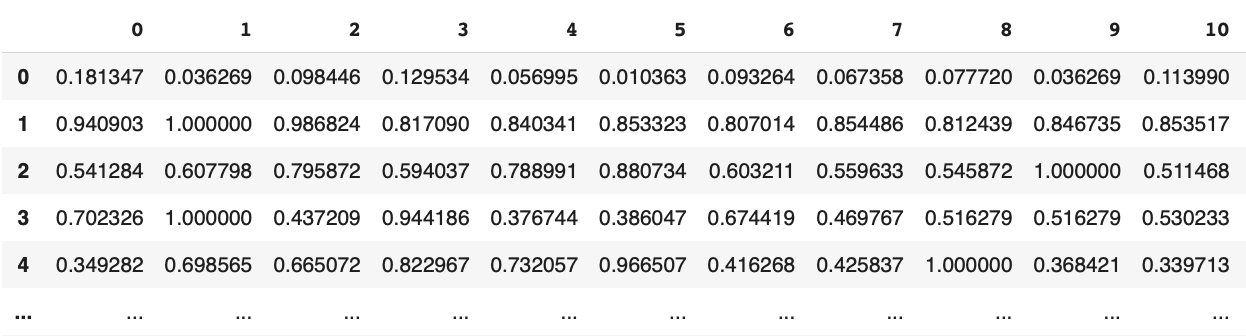

## ส่วนที่ต้องส่งงาน

เขียนโปรแกรม **เฉพาะ** ในเซลล์นี้เท่านั้น และให้ส่งไฟล์ ipynb (เลือก File->Download->Download ipynb จาก colab) **เปลี่ยนชื่อไฟล์ให้เป็น HW12_xxxxxxxxxx.ipynb โดย xxxxxxxxxx เป็นเลขประจำตัวนิสิต ใน MyCourseVille 

In [ ]:
# Answer Cell. Do not modify this line. 
import numpy as np


#1
def get_province_max( provinces,a ):
    return provinces[a == max(a)]

def get_province_min( provinces,a ):
    return provinces[a == min(a)]

def find_max_min_on_date(provinces,dates,data,date):
    dates_lst =dates.tolist()
    collumn =  dates_lst.index(date)
    data_day_x = data[::,collumn]
    dic = {'max':list() , 'min':list()}
    dic['max'] = (get_province_max(provinces,data_day_x).tolist())
    dic['min'] = (get_province_min(provinces,data_day_x).tolist())
    return dic
#--------------------------------------------------------------------------------------
#2
def get_dates_min( dates,a ):
    return dates[a == min(a)]

def get_dates_max( dates,a ):
    return dates[a == max(a)]

def find_max_min_in_province(provinces,dates,data,province):
    province_lst =provinces.tolist()
    row =  province_lst.index(province)
    data_provinge_x = data[row,::]
    dic = {'max':list() , 'min':list()}
    dic['max'] = (get_dates_max(dates,data_provinge_x).tolist())
    dic['min'] = (get_dates_min(dates,data_provinge_x).tolist())
    
    return dic
#------------------------------------------------------------------------------------------
#print(find_max_min_in_province(provinces,dates,data,'บึงกาฬ'))
#3
def find_average_growth(provinces,data,n):
    data_n_day = data[ ::  ,  data.shape[1]-n:: ]
    data_one_day_ago = data[ ::  ,  data.shape[1]-n-1:-1: ]
    rate_growth = (data_n_day - data_one_day_ago) / data_one_day_ago
    av_rate_growth = np.sum(rate_growth,axis=1)/n
    lst = av_rate_growth.tolist()
    lst2 = []
    
    for e in range(len(lst)) :
      lst2.append((lst[e],provinces[e]))
    return sorted(lst2)
#----------------------------------------
#4
def normalize(data):
    data_prv_max = np.max(data, axis=1)
    dd = data_prv_max.reshape(len(data),1)
    data_normalize = data / dd
    return data_normalize
#---------------------------------------------------


{'max': ['กรุงเทพมหานคร'], 'min': ['ยโสธร', 'อุทัยธานี']}
{'max': ['กรุงเทพมหานคร'], 'min': ['แม่ฮ่องสอน']}
{'max': ['2021-08-21'], 'min': ['2021-09-20', '2021-09-26', '2021-10-03', '2021-10-29', '2021-11-08']}
{'max': ['2021-08-14'], 'min': ['2021-10-27']}
[(-0.4233153130500377, 'แม่ฮ่องสอน'), (-0.40740740740740744, 'บึงกาฬ'), (-0.3923976608187134, 'ชัยนาท'), (-0.29259825604165224, 'สมุทรสาคร'), (-0.26544540229885055, 'สุรินทร์'), (-0.24444444444444446, 'พังงา'), (-0.19538818392686585, 'ชลบุรี'), (-0.193719806763285, 'สิงห์บุรี'), (-0.18224524480279425, 'ปราจีนบุรี'), (-0.17393939393939395, 'หนองคาย'), (-0.14581487388504932, 'ตราด'), (-0.12982759199061766, 'จันทบุรี'), (-0.12489132238261158, 'เชียงราย'), (-0.10604321226818969, 'ฉะเชิงเทรา'), (-0.10447232178414974, 'ตาก'), (-0.101010101010101, 'มุกดาหาร'), (-0.09679072182375813, 'ยะลา'), (-0.0948160160027652, 'ชุมพร'), (-0.09303350970017638, 'ศรีสะเกษ'), (-0.08922877546798517, 'นครสวรรค์'), (-0.08054559936280366, 'พิษณุโลก'), (-0.06726

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning:

divide by zero encountered in true_divide



## ส่วนแสดงผลลัพธ์เล็กน้อย 

### กราฟแสดงจำนวนผู้ติดเชื้อที่รายงานรายวันแยกตามจังหวัด

In [ ]:
import plotly.graph_objects as go 

fig=go.Figure()
for i in range(data.shape[0]):
  fig.add_trace(go.Scatter(y=data[i,:],x=dates,name=provinces[i]))
fig.show()

### กราฟแสดงจำนวนผู้ติดเชื้อที่รายงานรายวันแยกตามจังหวัด (Normalized)

In [ ]:
fig=go.Figure()
n_data=normalize(data)
for i in range(data.shape[0]):
  fig.add_trace(go.Scatter(y=n_data[i,:],x=dates,name=provinces[i]))
fig.show()